# การพยากรณ์ผลผลิตของกุ้งในประเทศไทย

# ชื่อสมาชิก


1.   64122250044 ชนัดพล พูสุวรรณ
2.   64122250045 แทนไทย เหมะรักษ์




# Github  Dataset

https://github.com/Tanthaii/Pj01

# แหล่งที่มาของข้อมูล

1.ผลผลิตของกุ้ง https://catalog.oae.go.th/dataset/dataset66_13_01

2.อุณหภูมิ https://data.go.th/en/dataset/tmax-tmin

3.ปริมาณฝน https://data.go.th/en/dataset/monthly-rainfall

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# นำเข้าข้อมูลผลผลิตกุ้ง

มี column ทั้งหมด 6 column
1.   YEAR_R  ปี
2.   FULL_NAME ชื่อ
3.   PROV_CODE ไอดีจังหวัด
4.   PROVINCE_N ชื่อจังหวัด
5.   PRODUCT ผลิตภัณฑ์
6.   HARVEST_AREA พื้นที่เก็บเกี่ยวที่





In [ ]:
shrimp_all = pd.read_csv('https://raw.githubusercontent.com/Tanthaii/Pj01/main/%E0%B8%9B%E0%B8%A3%E0%B8%B4%E0%B8%A1%E0%B8%B2%E0%B8%93%E0%B8%9C%E0%B8%A5%E0%B8%9C%E0%B8%A5%E0%B8%B7%E0%B8%94%E0%B8%81%E0%B8%B8%E0%B9%89%E0%B8%87.csv')
shrimp_all

,YEAR_R,FULL_NAME,PROV_CODE,PROVINCE_N,PRODUCT,HARVEST_AREA
0,2002,กุ้งกุลาดำ,10,กรุงเทพมหานคร,1014,146
1,2002,กุ้งกุลาดำ,13,ปทุมธานี,1529,867
2,2002,กุ้งกุลาดำ,26,นครนายก,7463,669
3,2002,กุ้งกุลาดำ,25,ปราจีนบุรี,17583,729
4,2002,กุ้งกุลาดำ,24,ฉะเชิงเทรา,17047,490
...,...,...,...,...,...,...
475,2021,กุ้งกุลาดำ,93,พัทลุง,8,889
476,2021,กุ้งกุลาดำ,90,สงขลา,621,1288
477,2021,กุ้งกุลาดำ,91,สตูล,533,2221
478,2021,กุ้งกุลาดำ,94,ปัตตานี,23,821


In [ ]:
shrimp_all.shape

(480, 6)

In [ ]:
shrimp_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YEAR_R        480 non-null    int64 
 1   FULL_NAME     480 non-null    object
 2   PROV_CODE     480 non-null    int64 
 3   PROVINCE_N    480 non-null    object
 4   PRODUCT       480 non-null    int64 
 5   HARVEST_AREA  480 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 22.6+ KB


In [ ]:
import folium
import geopandas as gpd
import random

# Load GeoJSON data for Thailand provinces
geojson_url = "https://raw.githubusercontent.com/Tanthaii/Pj01/main/provinces.geojson"
thailand_provinces = gpd.read_file(geojson_url)

# Create a Folium map centered around Thailand
thailand_coordinates = (11.348381898597856, 99.32311640203335)
my_map = folium.Map(location=thailand_coordinates, zoom_start=8)


# Define a custom styling function with random colors
def style_function(feature):
    # Generate a random color in hex format
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# Add GeoJSON layer for Thailand provinces with custom styling
folium.GeoJson(
    thailand_provinces,
    name='geojson',
    style_function=style_function
).add_to(my_map)

# Clear previous markers
marker_group = folium.FeatureGroup(name='Markers').add_to(my_map)

# Add markers for specified provinces
locations = {
    'ปราจีนบุรี': {'location': (14.0583244, 101.3827834), 'color': 'blue'},
    'ฉะเชิงเทรา': {'location': (13.6554592, 101.072966), 'color': 'red'},
    'จันทบุรี': {'location': (12.6112394, 102.1037337), 'color': 'green'},
    'ตราด': {'location': (12.2387911, 102.3120135), 'color': 'orange'},
    'ระยอง': {'location': (12.805389, 101.2598305), 'color': 'purple'},
    'ชลบุรี': {'location': (13.3611431, 100.9846717), 'color': 'darkred'},
    'สมุทรปราการ': {'location': (13.4877644, 100.2845934), 'color': 'lightblue'},
    'กรุงเทพมหานคร': {'location': (13.7563309, 100.5017651), 'color': 'darkblue'},
    'สมุทรสาคร': {'location': (13.5489074, 100.2743952), 'color': 'darkgreen'},
    'สมุทรสงคราม': {'location': (13.406856, 100.0029914), 'color': 'gray'},
    'เพชรบุรี': {'location': (13.4889592, 99.9451646), 'color': 'orange'},
    'ประจวบคีรีขันธ์': {'location': (11.9914332, 99.882888), 'color': 'black'},
    'ชุมพร': {'location': (10.39579869304647, 99.08198937303766), 'color': 'blue'},
    'ระนอง': {'location': (9.934629476268167, 98.63966193725061), 'color': 'red'},
    'สุราษฎร์ธานี': {'location': (8.928140414012539, 98.94522672220086), 'color': 'green'},
    'พังงา': {'location': (8.615056013321578, 98.42286882717158), 'color': 'orange'},
    'ภูเก็ต': {'location': (7.97395222866153, 98.34033744435013), 'color': 'purple'},
    'นครศรีธรรมราช': {'location': (8.296481173044892, 99.78329018178862), 'color': 'lightblue'},
    'พัทลุง': {'location': (7.519331964319986, 100.07768152642802), 'color': 'darkgreen'},
    'สงขลา': {'location': (6.894582483375718, 100.58969163543715), 'color': 'gray'},
    'สตูล': {'location': (6.887765382441354, 99.9606383912983), 'color': 'orange'},
    'ปัตตานี': {'location': (6.756006418059202, 101.31865723859552), 'color': 'black'},
    'นราธิวาส': {'location': (6.178263826663819, 101.71269458368498), 'color': 'blue'}
}

for label, info in locations.items():
    location = info['location']
    color = info['color']
    folium.Marker(location=location, popup=label, icon=folium.Icon(color=color, icon='map-marker')).add_to(marker_group)

# Add the marker group to the map
marker_group.add_to(my_map)

# Add layer control
folium.LayerControl().add_to(my_map)

# Display the map
my_map


# เปลี่ยนชื่อ column ใหม่ให้สอดคล้องกับชุดข้อมูลอื่น

In [ ]:
shrimp_all.rename(columns = {'YEAR_R':'Year', 'FULL_NAME':'NAME',  'PROV_CODE':'ProvinceID' , 'PROVINCE_N':'ProvinceName',
                             'PRODUCT':'PRODUCT',
                             'HARVEST_AREA':'HarvArea',},
                             inplace = True)
shrimp_all

,Year,NAME,ProvinceID,ProvinceName,PRODUCT,HarvArea
0,2002,กุ้งกุลาดำ,10,กรุงเทพมหานคร,1014,146
1,2002,กุ้งกุลาดำ,13,ปทุมธานี,1529,867
2,2002,กุ้งกุลาดำ,26,นครนายก,7463,669
3,2002,กุ้งกุลาดำ,25,ปราจีนบุรี,17583,729
4,2002,กุ้งกุลาดำ,24,ฉะเชิงเทรา,17047,490
...,...,...,...,...,...,...
475,2021,กุ้งกุลาดำ,93,พัทลุง,8,889
476,2021,กุ้งกุลาดำ,90,สงขลา,621,1288
477,2021,กุ้งกุลาดำ,91,สตูล,533,2221
478,2021,กุ้งกุลาดำ,94,ปัตตานี,23,821


In [ ]:
shrimp_all = shrimp_all[(shrimp_all['Year'] >= 2010) & (shrimp_all['Year'] <= 2021)]
shrimp_all

,Year,NAME,ProvinceID,ProvinceName,PRODUCT,HarvArea
56,2012,กุ้งขาวแวนนาไม,10,กรุงเทพมหานคร,17,378
57,2012,กุ้งขาวแวนนาไม,25,ปราจีนบุรี,6891,1009
58,2012,กุ้งขาวแวนนาไม,24,ฉะเชิงเทรา,21225,1041
59,2012,กุ้งขาวแวนนาไม,22,จันทบุรี,60628,2346
60,2012,กุ้งขาวแวนนาไม,23,ตราด,37936,3107
...,...,...,...,...,...,...
475,2021,กุ้งกุลาดำ,93,พัทลุง,8,889
476,2021,กุ้งกุลาดำ,90,สงขลา,621,1288
477,2021,กุ้งกุลาดำ,91,สตูล,533,2221
478,2021,กุ้งกุลาดำ,94,ปัตตานี,23,821


# กำจัดข้อมูลที่ผิดปกติเกินเหตุ (Over Outlier)

In [ ]:
shrimp_all = shrimp_all[(shrimp_all['PRODUCT'] > 1000) & (shrimp_all['PRODUCT'] < 50000)]
shrimp_all

,Year,NAME,ProvinceID,ProvinceName,PRODUCT,HarvArea
57,2012,กุ้งขาวแวนนาไม,25,ปราจีนบุรี,6891,1009
58,2012,กุ้งขาวแวนนาไม,24,ฉะเชิงเทรา,21225,1041
60,2012,กุ้งขาวแวนนาไม,23,ตราด,37936,3107
61,2012,กุ้งขาวแวนนาไม,21,ระยอง,25110,2631
62,2012,กุ้งขาวแวนนาไม,20,ชลบุรี,1184,462
...,...,...,...,...,...,...
456,2021,กุ้งขาวแวนนาไม,94,ปัตตานี,2676,2073
459,2021,กุ้งกุลาดำ,24,ฉะเชิงเทรา,1646,1978
469,2021,กุ้งกุลาดำ,84,สุราษฎร์ธานี,1096,2030
470,2021,กุ้งกุลาดำ,82,พังงา,3211,1475


# นำเข้าข้อมูลอุณหภูมิของแต่ละปี

มี column ทั้งหมด 6 column
1.   Yea  ปี
2.   Month เดือน
3.   ProvinceID ไอดีจังหวัด
4.   ProvinceName ชื่อจังหวัด
5.   Tmax ค่าสูงสุด
6.   Tmin ค่าน้อยสุด


In [ ]:
temp = pd.read_csv('https://raw.githubusercontent.com/Tanthaii/Pj01/main/Temp02.csv')
temp

,Year,Month,ProvinceID,ProvinceName,Tmax,Tmin
0,2018,1,10,กรุงเทพมหานคร,35.5,18.0
1,2018,1,11,สมุทรปราการ,36.0,18.4
2,2018,1,13,ปทุมธานี,35.6,18.0
3,2018,1,14,พระนครศรีอยุธยา,35.5,15.4
4,2018,1,16,ลพบุรี,36.2,14.7
...,...,...,...,...,...,...
4480,2023,9,92,ตรัง,33.7,23.5
4481,2023,9,93,พัทลุง,34.9,24.0
4482,2023,9,94,ปัตตานี,35.4,23.7
4483,2023,9,95,ยะลา,35.1,23.4


In [ ]:
temp.shape

(4485, 6)

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          4485 non-null   int64  
 1   Month         4485 non-null   int64  
 2   ProvinceID    4485 non-null   int64  
 3   ProvinceName  4485 non-null   object 
 4   Tmax          4485 non-null   float64
 5   Tmin          4485 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 210.4+ KB


# เช็คค่า Missing

In [ ]:
temp.isnull().sum()

Year            0
Month           0
ProvinceID      0
ProvinceName    0
Tmax            0
Tmin            0
dtype: int64

# เพิ่มค่า AvgTemp

In [ ]:
temp['AvgTemp'] = (temp['Tmax'] + temp['Tmin']) / 2
temp

,Year,Month,ProvinceID,ProvinceName,Tmax,Tmin,AvgTemp
0,2018,1,10,กรุงเทพมหานคร,35.5,18.0,26.75
1,2018,1,11,สมุทรปราการ,36.0,18.4,27.20
2,2018,1,13,ปทุมธานี,35.6,18.0,26.80
3,2018,1,14,พระนครศรีอยุธยา,35.5,15.4,25.45
4,2018,1,16,ลพบุรี,36.2,14.7,25.45
...,...,...,...,...,...,...,...
4480,2023,9,92,ตรัง,33.7,23.5,28.60
4481,2023,9,93,พัทลุง,34.9,24.0,29.45
4482,2023,9,94,ปัตตานี,35.4,23.7,29.55
4483,2023,9,95,ยะลา,35.1,23.4,29.25


# ทำการเลือกข้อมูลที่อยู่ในช่วงปี 2019-2021

In [ ]:
temp = temp[(temp['Year'] >= 2002) & (temp['Year'] <= 2021)]
temp

,Year,Month,ProvinceID,ProvinceName,Tmax,Tmin,AvgTemp
0,2018,1,10,กรุงเทพมหานคร,35.5,18.0,26.75
1,2018,1,11,สมุทรปราการ,36.0,18.4,27.20
2,2018,1,13,ปทุมธานี,35.6,18.0,26.80
3,2018,1,14,พระนครศรีอยุธยา,35.5,15.4,25.45
4,2018,1,16,ลพบุรี,36.2,14.7,25.45
...,...,...,...,...,...,...,...
3115,2021,12,92,ตรัง,34.1,22.3,28.20
3116,2021,12,93,พัทลุง,32.4,22.0,27.20
3117,2021,12,94,ปัตตานี,32.7,21.8,27.25
3118,2021,12,95,ยะลา,33.5,21.4,27.45


# ทำการเปลี่ยนข้อมูลเดือนให้เป็นปีโดยใช้ groupby

In [ ]:
grouped_temp =temp.groupby(
                    ['Year','ProvinceID','ProvinceName']
                    )['AvgTemp'].sum().reset_index()
grouped_temp['AvgTemp'] = grouped_temp['AvgTemp'] / 12
grouped_temp

,Year,ProvinceID,ProvinceName,AvgTemp
0,2018,10,กรุงเทพมหานคร,29.050000
1,2018,11,สมุทรปราการ,28.275000
2,2018,13,ปทุมธานี,29.800000
3,2018,14,พระนครศรีอยุธยา,28.058333
4,2018,16,ลพบุรี,28.279167
...,...,...,...,...
256,2021,92,ตรัง,28.712500
257,2021,93,พัทลุง,28.520833
258,2021,94,ปัตตานี,28.666667
259,2021,95,ยะลา,28.654167


In [ ]:
grouped_temp.shape

(261, 4)

In [ ]:
grouped_temp.columns

Index(['Year', 'ProvinceID', 'ProvinceName', 'AvgTemp'], dtype='object')

# นำเข้าข้อมูลปริมาณน้ำฝนของแต่ละปี

มี column ทั้งหมด 6 column
1.   ProvinceID   ไอดีจังหวัด
2.   ProvinceName ชื่อจังหวัดไทย
3.   ProvinceName 2 ชื่อจังหวัดอังกฤษ
4.   MinRain ปริมาณน้ำฝนน้อยสุด
5.   MaxRain ปริมาณปริมาณน้ำฝนมากสุด
6.   AvgRain ปริมาณน้ำฝนเฉลี่ย
7.   region ภูมิภาค
8.   Year ปี
9.   Month เดือน
10. Date วัน
11. Month_TH เดือนที่เป็นภาษาไทย


In [ ]:
rainfall = pd.read_csv('https://raw.githubusercontent.com/phatt20/pro01/main/rain.csv')
rainfall

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
0,10,กรุงเทพมหานคร,Bangkok,54.299999,257.230011,142.119137,กลาง,2018,1,1/1/18,มกราคม
1,11,สมุทรปราการ,Samut Prakan,76.250000,256.100006,137.302046,กลาง,2018,1,1/1/18,มกราคม
2,12,นนทบุรี,Nonthaburi,38.360001,161.470001,113.433771,กลาง,2018,1,1/1/18,มกราคม
3,13,ปทุมธานี,Pathum Thani,51.439999,116.500000,82.901688,กลาง,2018,1,1/1/18,มกราคม
4,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,8.850000,88.589996,39.960089,กลาง,2018,1,1/1/18,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
4230,92,ตรัง,Trang,158.050003,433.649994,293.423136,ใต้,2022,7,1/7/22,กรกฎาคม
4231,93,พัทลุง,Phatthalung,101.309998,264.140015,144.777569,ใต้,2022,7,1/7/22,กรกฎาคม
4232,94,ปัตตานี,Pattani,127.589996,214.440002,172.280939,ใต้,2022,7,1/7/22,กรกฎาคม
4233,95,ยะลา,Yala,122.440002,189.169998,148.495964,ใต้,2022,7,1/7/22,กรกฎาคม


# ทำการเลือกข้อมูลที่อยู่ในช่วงปี 2019-2021

In [ ]:
rainfall = rainfall[(rainfall['Year'] >= 2002) & (rainfall['Year'] <= 2021)]
rainfall

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
0,10,กรุงเทพมหานคร,Bangkok,54.299999,257.230011,142.119137,กลาง,2018,1,1/1/18,มกราคม
1,11,สมุทรปราการ,Samut Prakan,76.250000,256.100006,137.302046,กลาง,2018,1,1/1/18,มกราคม
2,12,นนทบุรี,Nonthaburi,38.360001,161.470001,113.433771,กลาง,2018,1,1/1/18,มกราคม
3,13,ปทุมธานี,Pathum Thani,51.439999,116.500000,82.901688,กลาง,2018,1,1/1/18,มกราคม
4,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,8.850000,88.589996,39.960089,กลาง,2018,1,1/1/18,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
3691,92,ตรัง,Trang,55.889999,243.660004,114.582382,ใต้,2021,12,1/12/21,ธันวาคม
3692,93,พัทลุง,Phatthalung,134.649994,263.739990,198.607832,ใต้,2021,12,1/12/21,ธันวาคม
3693,94,ปัตตานี,Pattani,197.309998,369.010010,267.461684,ใต้,2021,12,1/12/21,ธันวาคม
3694,95,ยะลา,Yala,205.910004,344.429993,294.671922,ใต้,2021,12,1/12/21,ธันวาคม


#ทำการเปลี่ยนข้อมูลเดือนให้เป็นปีโดยใช้ groupby

In [ ]:
grouped_rainfall = rainfall.groupby(['Year','ProvinceID','ProvinceName'])['AvgRain'].sum().reset_index()
grouped_rainfall['AvgRain'] = grouped_rainfall['AvgRain'] / 12
grouped_rainfall

,Year,ProvinceID,ProvinceName,AvgRain
0,2018,10,กรุงเทพมหานคร,138.175537
1,2018,11,สมุทรปราการ,124.844423
2,2018,12,นนทบุรี,139.236354
3,2018,13,ปทุมธานี,130.418686
4,2018,14,พระนครศรีอยุธยา,103.856999
...,...,...,...,...
303,2021,92,ตรัง,190.088900
304,2021,93,พัทลุง,174.842118
305,2021,94,ปัตตานี,168.229246
306,2021,95,ยะลา,189.371158


# เช็คค่า Missing

In [ ]:
grouped_rainfall.isnull().sum()

Year            0
ProvinceID      0
ProvinceName    0
AvgRain         0
dtype: int64

# ผสานชุดข้อมูลปริมาณฝนกับชุดข้อมูลของอุณภูมิเข้าด้วยกัน

In [ ]:
rainfall_temp = grouped_temp.merge(grouped_rainfall, on=['Year', 'ProvinceName','ProvinceID'])
rainfall_temp

,Year,ProvinceID,ProvinceName,AvgTemp,AvgRain
0,2018,10,กรุงเทพมหานคร,29.050000,138.175537
1,2018,11,สมุทรปราการ,28.275000,124.844423
2,2018,13,ปทุมธานี,29.800000,130.418686
3,2018,14,พระนครศรีอยุธยา,28.058333,103.856999
4,2018,16,ลพบุรี,28.279167,110.971818
...,...,...,...,...,...
256,2021,92,ตรัง,28.712500,190.088900
257,2021,93,พัทลุง,28.520833,174.842118
258,2021,94,ปัตตานี,28.666667,168.229246
259,2021,95,ยะลา,28.654167,189.371158


# ผสานชุดข้อมูลปริมาณกุ้งกับชุดข้อมูลของอุณภูมิและปริมาณฝนเข้าด้วยกัน

In [ ]:
shrimp_tempandrainfall = shrimp_all.merge(rainfall_temp, on=['Year', 'ProvinceName','ProvinceID'])
shrimp_tempandrainfall

,Year,NAME,ProvinceID,ProvinceName,PRODUCT,HarvArea,AvgTemp,AvgRain
0,2018,กุ้งขาวแวนนาไม,25,ปราจีนบุรี,9923,674,28.729167,162.585384
1,2018,กุ้งขาวแวนนาไม,24,ฉะเชิงเทรา,24803,1168,27.637500,145.519321
2,2018,กุ้งขาวแวนนาไม,22,จันทบุรี,30556,1667,27.800000,191.964459
3,2018,กุ้งขาวแวนนาไม,23,ตราด,23573,3113,27.637500,252.901957
4,2018,กุ้งขาวแวนนาไม,21,ระยอง,10974,1688,28.229167,127.257737
...,...,...,...,...,...,...,...,...
91,2021,กุ้งขาวแวนนาไม,92,ตรัง,19607,3006,28.712500,190.088900
92,2021,กุ้งขาวแวนนาไม,93,พัทลุง,1376,1957,28.520833,174.842118
93,2021,กุ้งขาวแวนนาไม,90,สงขลา,14288,1929,28.387500,165.667215
94,2021,กุ้งขาวแวนนาไม,91,สตูล,8264,2034,28.675000,199.217486


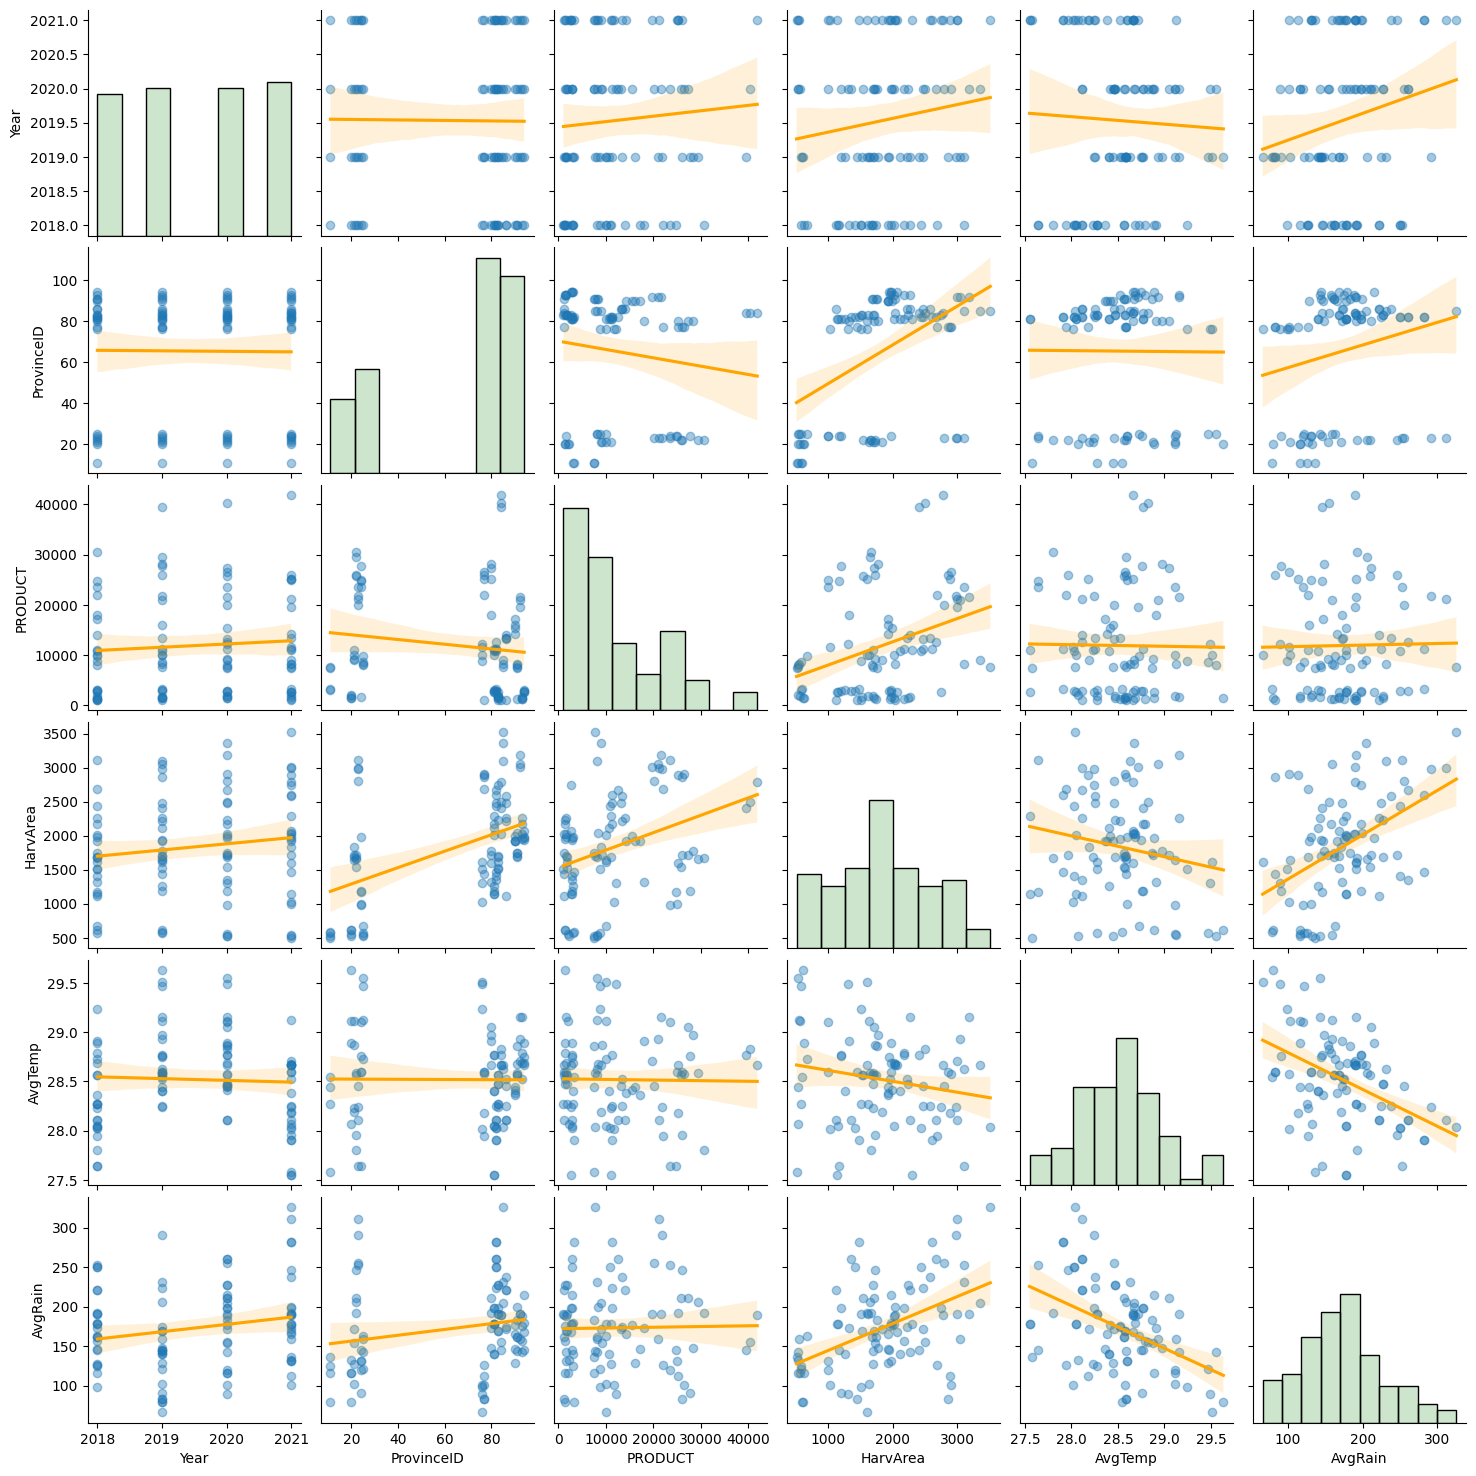

In [ ]:
sns.pairplot(shrimp_tempandrainfall,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': 0.4},
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

# เลือก Features ที่จำเป็น

In [ ]:
shrimp_alldata= shrimp_tempandrainfall[['PRODUCT','HarvArea','AvgTemp','AvgRain']]
shrimp_alldata

,PRODUCT,HarvArea,AvgTemp,AvgRain
0,9923,674,28.729167,162.585384
1,24803,1168,27.637500,145.519321
2,30556,1667,27.800000,191.964459
3,23573,3113,27.637500,252.901957
4,10974,1688,28.229167,127.257737
...,...,...,...,...
91,19607,3006,28.712500,190.088900
92,1376,1957,28.520833,174.842118
93,14288,1929,28.387500,165.667215
94,8264,2034,28.675000,199.217486


#เช็คค่า Missing

In [ ]:
shrimp_alldata.isnull().sum()

PRODUCT     0
HarvArea    0
AvgTemp     0
AvgRain     0
dtype: int64

# ทำการพลอตกราฟจากตาราง

<Axes: >

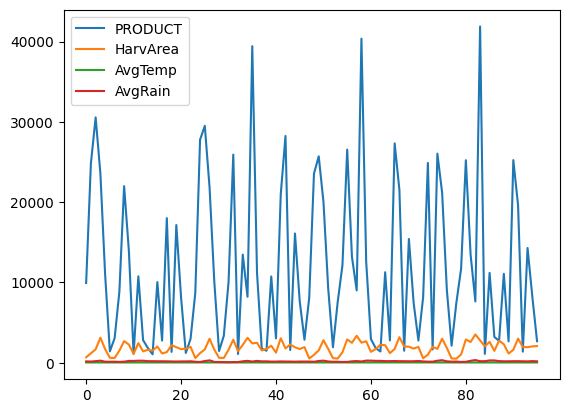

In [ ]:
shrimp_alldata.plot()

# ทำการพลอตกราฟความสัมพันธ์ระหว่างผลผลิตกับค่าเฉลี่ยอุณหภูมิและปริมาณน้ำฝนของแต่ละปี

<Axes: >

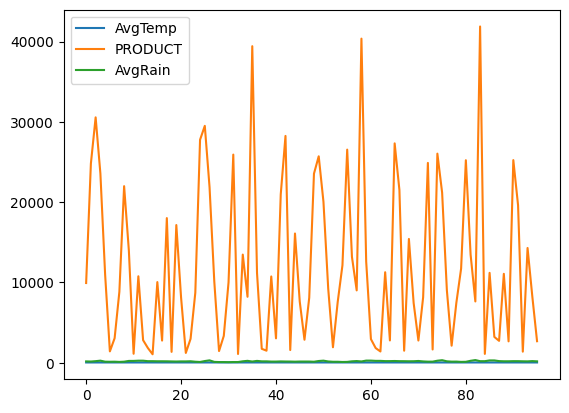

In [ ]:
columns_to_plot = ["AvgTemp", "PRODUCT","AvgRain"]
shrimp_alldata[columns_to_plot].plot()

## **การหาค่า outlier และการกำจัดค่า outlier**

In [ ]:
def IQR_Outlier_Detection(df, col):
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return upper_bound, lower_bound

In [ ]:
def fillNull(df, col):
  mean_value = df[col].mean()
  df[col].fillna(mean_value, inplace=True)

In [ ]:
def outlierToNull(df, col, upper, lower):
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)

In [ ]:
def complete_outlier(df, col):
  print('')
  upper_limit, lower_limit = IQR_Outlier_Detection(df, col)
  outlierToNull(df, col, upper_limit, lower_limit)
  fillNull(df, col)

In [ ]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# ตัวอย่างการใช้งาน
for column in shrimp_alldata.columns:
    outliers = detect_outliers_iqr(shrimp_alldata[column])
    print("Outliers in column", column, ":", shrimp_alldata[column][outliers])
    print("Number of outliers in column", column, ":", np.sum(outliers))

Outliers in column PRODUCT : Series([], Name: PRODUCT, dtype: int64)
Number of outliers in column PRODUCT : 0
Outliers in column HarvArea : Series([], Name: HarvArea, dtype: int64)
Number of outliers in column HarvArea : 0
Outliers in column AvgTemp : 28    29.633333
Name: AvgTemp, dtype: float64
Number of outliers in column AvgTemp : 1
Outliers in column AvgRain : 75    311.377997
82    325.525417
Name: AvgRain, dtype: float64
Number of outliers in column AvgRain : 2


In [ ]:
shrimp_alldata[column] =shrimp_alldata[column][~outliers]

<ipython-input-1003-2debc1c34b94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shrimp_alldata[column] =shrimp_alldata[column][~outliers]


In [ ]:
shrimp_alldata = shrimp_alldata.dropna(axis=0)

## **Outlier PRODUCT**

In [ ]:
shrimp_alldata.head(5)

,PRODUCT,HarvArea,AvgTemp,AvgRain
0,9923,674,28.729167,162.585384
1,24803,1168,27.637500,145.519321
2,30556,1667,27.800000,191.964459
3,23573,3113,27.637500,252.901957
4,10974,1688,28.229167,127.257737


In [ ]:
shrimp_alldata.head(5)

,PRODUCT,HarvArea,AvgTemp,AvgRain
0,9923,674,28.729167,162.585384
1,24803,1168,27.637500,145.519321
2,30556,1667,27.800000,191.964459
3,23573,3113,27.637500,252.901957
4,10974,1688,28.229167,127.257737


<Axes: ylabel='PRODUCT'>

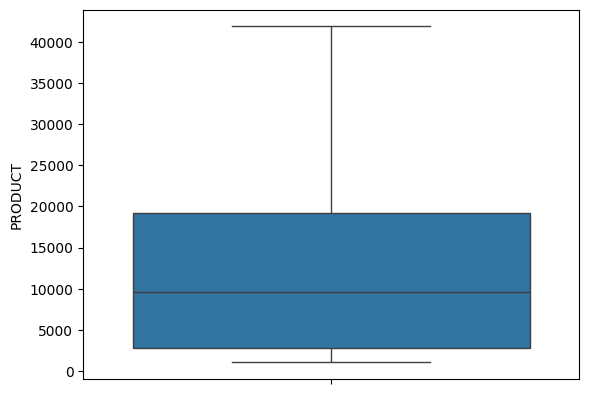

In [ ]:
sns.boxplot( shrimp_alldata['PRODUCT'])

In [ ]:
complete_outlier( shrimp_alldata, 'PRODUCT')

<ipython-input-1000-5bcc6bc327bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-999-a9c4cecadf4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


## **Outlier AvgTemp**

<Axes: ylabel='AvgTemp'>

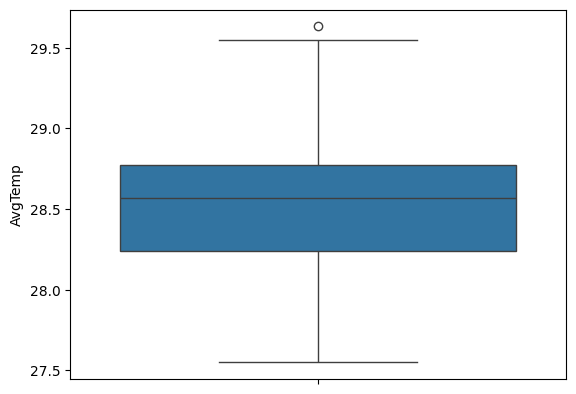

In [ ]:
sns.boxplot( shrimp_alldata['AvgTemp'])

In [ ]:
complete_outlier( shrimp_alldata, 'AvgTemp')

<ipython-input-1000-5bcc6bc327bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-999-a9c4cecadf4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


## **Outlier HarvArea**

<Axes: ylabel='HarvArea'>

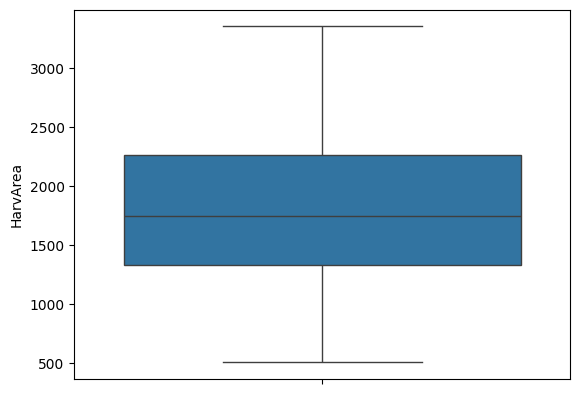

In [ ]:
sns.boxplot(shrimp_alldata['HarvArea'])

In [ ]:
complete_outlier( shrimp_alldata, 'HarvArea')

<ipython-input-1000-5bcc6bc327bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-999-a9c4cecadf4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


## **Outlier AvgRain**

<Axes: ylabel='AvgRain'>

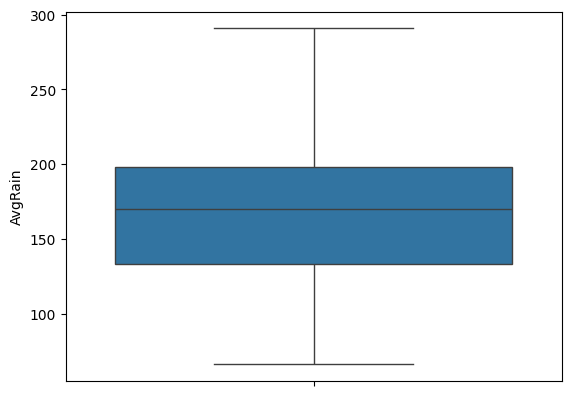

In [ ]:
sns.boxplot(shrimp_alldata['AvgRain'])

In [ ]:
complete_outlier( shrimp_alldata, 'AvgRain')

<ipython-input-1000-5bcc6bc327bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-999-a9c4cecadf4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


In [ ]:
shrimp_alldata

,PRODUCT,HarvArea,AvgTemp,AvgRain
0,9923,674,28.729167,162.585384
1,24803,1168,27.637500,145.519321
2,30556,1667,27.800000,191.964459
3,23573,3113,27.637500,252.901957
4,10974,1688,28.229167,127.257737
...,...,...,...,...
91,19607,3006,28.712500,190.088900
92,1376,1957,28.520833,174.842118
93,14288,1929,28.387500,165.667215
94,8264,2034,28.675000,199.217486


## **หาความสัมพันธ์ของข้อมูล**

In [ ]:
shrimp_alldata.corr()

,PRODUCT,HarvArea,AvgTemp,AvgRain
PRODUCT,1.000000,0.354182,0.017332,0.005319
HarvArea,0.354182,1.000000,-0.111792,0.409726
AvgTemp,0.017332,-0.111792,1.000000,-0.397128
AvgRain,0.005319,0.409726,-0.397128,1.000000


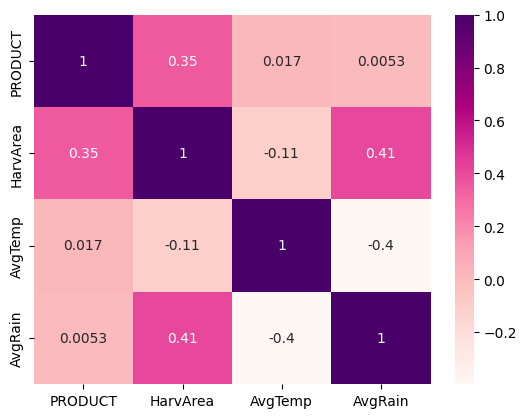

In [ ]:
sns.heatmap( shrimp_alldata.corr(), cmap="RdPu", annot=True)
plt.show()

## การแบ่งชุดข้อมูลออกเป็นชุดฝึกอบรมและชุดทดสอบ

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
shrimp_alldata.shape

(94, 4)

In [ ]:
# Features
X =  shrimp_alldata[['HarvArea','AvgTemp','AvgRain']]
# target
y =  shrimp_alldata['PRODUCT']

In [ ]:
X

,HarvArea,AvgTemp,AvgRain
0,674,28.729167,162.585384
1,1168,27.637500,145.519321
2,1667,27.800000,191.964459
3,3113,27.637500,252.901957
4,1688,28.229167,127.257737
...,...,...,...
91,3006,28.712500,190.088900
92,1957,28.520833,174.842118
93,1929,28.387500,165.667215
94,2034,28.675000,199.217486


In [ ]:
y

0      9923
1     24803
2     30556
3     23573
4     10974
      ...  
91    19607
92     1376
93    14288
94     8264
95     2676
Name: PRODUCT, Length: 94, dtype: int64

In [ ]:
# แบ่งชุดข้อมูล
# ชุดข้อมูลฝึกสอน 80%
# ชุดข้อมูลทดสอบ 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 3)
(19, 3)
(75,)
(19,)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    print(f"Model: {model_name}")
    print(f"R-squared: {round(r2,2)}")
    print(f"Mean Square Error: {round(mse,2)}")
    print(f"Root Mean Square Error: {round(rmse,2)}")
    print("")
    toRe = {
      'modelName' : model_name,
      'r2' : r2,
      'mse' : mse,
      'rmse' : rmse,
    }
    return toRe

## **การสร้างโมเดลจำลอง**

## **K-Nearest Neighbors Regression (KNN-R)**
หลักการทำงานของ KNN-R

เลือกค่า K: กำหนดค่า K ที่ต้องการ ซึ่งเป็นจำนวนขอข้อมูลที่ใกล้ที่สุดที่จะใช้ในการตัดสินใจ
คำนวนระยะทาง: เพื่อคำนวณระยะทางระหว่างชุดข้อมูลทดสอบกับชุดข้อมูลฝึกฝน โดยใช้สมการคำนวณระยะทาง Distance
หาข้อมูลที่ใกล้ที่สุด:

1.   เลือกค่า K: กำหนดค่า K ที่ต้องการ ซึ่งเป็นจำนวนขอข้อมูลที่ใกล้ที่สุดที่จะใช้ในการตัดสินใจ
2.   คำนวนระยะทาง: เพื่อคำนวณระยะทางระหว่างชุดข้อมูลทดสอบกับชุดข้อมูลฝึกฝน โดยใช้สมการคำนวณระยะทาง Distance
3.   หาข้อมูลที่ใกล้ที่สุด:




In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

## ทำ Normalization ข้อมูล

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.05394922, 0.5708061 , 0.42928958],
       [0.22813822, 0.        , 0.35339149],
       [0.40409027, 0.08496732, 0.55994747],
       [0.91396333, 0.        , 0.83095549],
       [0.41149506, 0.30936819, 0.27217654],
       [0.03385049, 0.65359477, 0.22146623],
       [0.02045134, 0.33333333, 0.26144378],
       [0.34943583, 0.83660131, 0.1439046 ],
       [0.76304654, 0.16122004, 0.26950585],
       [0.61389281, 0.24836601, 0.69078941],
       [0.20874471, 0.24836601, 0.69078941],
       [0.67559944, 0.20261438, 0.81592877],
       [0.31346968, 0.20261438, 0.81592877],
       [0.38363893, 0.33333333, 0.5534159 ],
       [0.348378  , 0.33333333, 0.5534159 ],
       [0.5264457 , 0.21350763, 0.49570202],
       [0.22143865, 0.21350763, 0.49570202],
       [0.28244006, 0.66448802, 0.47385596],
       [0.58356841, 0.60348584, 0.40480985],
       [0.49682652, 0.37908497, 0.35791627],
       [0.41078984, 0.48583878, 0.42328914],
       [0.43124118, 0.48583878, 0.42328914],
       [0.

In [ ]:
X_test_scaled

array([[ 0.46262341,  0.28976035,  0.46832917],
       [ 0.0038787 ,  0.22657952,  0.29323145],
       [-0.00564175, -0.03050109,  0.31431768],
       [ 0.17771509,  0.19607843,  0.15549513],
       [ 0.83392102,  0.28540305,  0.20773982],
       [ 0.72566996,  0.32244009,  0.76159067],
       [ 0.79866008,  0.53594771,  0.55079322],
       [ 0.53208745,  0.53594771,  0.55079322],
       [ 0.73448519,  0.1416122 ,  0.96017378],
       [ 0.33638928,  0.1416122 ,  0.96017378],
       [ 0.78561354,  0.31590414,  0.58619978],
       [ 0.62658674, -0.04575163,  0.497025  ],
       [ 0.21755994, -0.04575163,  0.497025  ],
       [ 0.38187588,  0.53812636,  0.55840885],
       [ 0.87623413,  0.5620915 ,  0.55160627],
       [ 0.50634697,  0.46187364,  0.48379909],
       [ 0.49647391,  0.39215686,  0.44299544],
       [ 0.53349788,  0.54248366,  0.59220394],
       [ 0.54724965,  0.53812636,  0.45438959]])

## สร้างโมเดล (Create Model)

In [ ]:
knnr = KNeighborsRegressor(n_neighbors = 8, metric='euclidean')
knnr.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=8)

Text(0.5, 1.0, 'ELBOW PLOT')

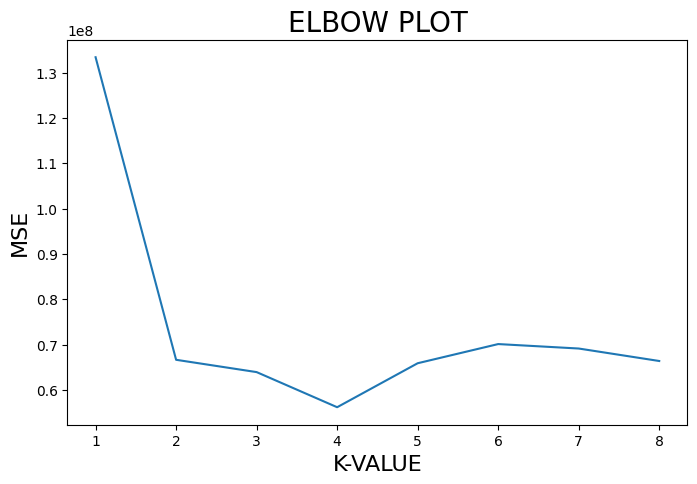

In [ ]:
from sklearn.metrics import mean_squared_error
fig, ax = plt.subplots(figsize=(8,5))
k_list = np.arange(1, 9, 1)
knn_dict = {}
for i in k_list:
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(X_train_scaled, y_train)
    y_knn_pred = model_knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_knn_pred)
    knn_dict[i] = mse
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=16)
ax.set_ylabel('MSE' ,fontsize=16)
ax.set_title('ELBOW PLOT' ,fontsize=20)

### การพยากรณ์ (Predictions)

ชุดข้อมูลฝึกฝน (Training Set)

In [ ]:
y_pred_train = knnr.predict(X_train)
y_pred_train

array([ 4744.625, 11548.375, 13534.   , 19698.875,  9914.625,  4744.625,
        4515.25 ,  7543.375, 21476.625, 11647.5  , 13833.625, 16482.   ,
        7769.875, 13671.75 ,  9068.375,  6791.125, 13833.625,  8818.125,
        6906.75 ,  8616.   , 15602.125, 11334.75 ,  6791.125,  5279.75 ,
       11548.375, 13534.   , 21076.875, 11056.   ,  4449.75 ,  4442.125,
        7403.5  , 19765.125,  9819.25 , 11647.5  , 19698.875, 17990.25 ,
       17883.375,  7543.375,  9176.   ,  8176.25 , 11776.5  , 21076.875,
       11691.125, 11647.5  ,  8616.   ,  9580.875,  8616.   ,  5279.75 ,
       13833.625, 12752.375, 19765.125,  9176.   ,  5279.75 ,  5279.75 ,
       11544.875, 21135.75 , 18885.625, 19698.875, 18885.625, 19504.75 ,
        8556.25 , 16535.125, 11647.5  ,  6906.75 , 11548.375, 13137.625,
       19698.875,  5990.5  ,  6791.125, 13574.   ,  6791.125,  5279.75 ,
       13833.625,  8457.375, 15671.5  ])

ชุดข้อมูลทดสอบ (Test Set)

In [ ]:
y_pred_test = knnr.predict(X_test)
y_pred_test

array([10463.875,  5279.75 ,  5279.75 , 13833.625, 19765.125, 21192.375,
       23784.   ,  5990.5  , 21192.375,  7863.875, 22560.5  , 11650.375,
       13833.625, 13575.25 , 21076.875,  8616.   ,  8616.   ,  5990.5  ,
        6864.75 ])

In [ ]:
y_pred = knnr.predict(X)
y_pred

array([ 4744.625, 11548.375, 13534.   , 19698.875,  9914.625,  4744.625,
        4515.25 ,  7543.375, 21476.625, 11647.5  , 13833.625, 16482.   ,
        7769.875, 13671.75 ,  9068.375,  6791.125, 13833.625,  8818.125,
        6906.75 ,  8616.   , 15602.125, 11334.75 ,  6791.125,  5279.75 ,
       11548.375, 13534.   , 21076.875, 11056.   ,  4449.75 ,  4442.125,
        7403.5  , 19765.125,  9819.25 , 11647.5  , 19698.875, 17990.25 ,
       17883.375,  7543.375,  9176.   ,  8176.25 , 11776.5  , 21076.875,
       11691.125, 11647.5  ,  8616.   ,  9580.875,  8616.   ,  5279.75 ,
       13833.625, 12752.375, 19765.125,  9176.   ,  5279.75 ,  5279.75 ,
       11544.875, 21135.75 , 18885.625, 19698.875, 18885.625, 19504.75 ,
        8556.25 , 16535.125, 11647.5  ,  6906.75 , 11548.375, 13137.625,
       19698.875,  5990.5  ,  6791.125, 13574.   ,  6791.125,  5279.75 ,
       13833.625,  8457.375, 15671.5  , 10463.875,  5279.75 ,  5279.75 ,
       13833.625, 19765.125, 21192.375, 23784.   , 

## **ชุดข้อมูล X (train+test)**

In [ ]:
shrimp_alldata['Predicted_PRODUCT'] = knnr.predict(X)
shrimp_alldata

<ipython-input-1035-ebc694f337ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shrimp_alldata['Predicted_PRODUCT'] = knnr.predict(X)


,PRODUCT,HarvArea,AvgTemp,AvgRain,Predicted_PRODUCT
0,9923,674,28.729167,162.585384,4744.625
1,24803,1168,27.637500,145.519321,11548.375
2,30556,1667,27.800000,191.964459,13534.000
3,23573,3113,27.637500,252.901957,19698.875
4,10974,1688,28.229167,127.257737,9914.625
...,...,...,...,...,...
91,19607,3006,28.712500,190.088900,21076.875
92,1376,1957,28.520833,174.842118,8616.000
93,14288,1929,28.387500,165.667215,8616.000
94,8264,2034,28.675000,199.217486,5990.500


In [ ]:
absolute_dis_list = abs(y_pred -  shrimp_alldata['PRODUCT'])
result_df_knnr = pd.DataFrame({'y_pred': y_pred, 'complete_df_prod':  shrimp_alldata['PRODUCT'], 'absolute_difference': absolute_dis_list})

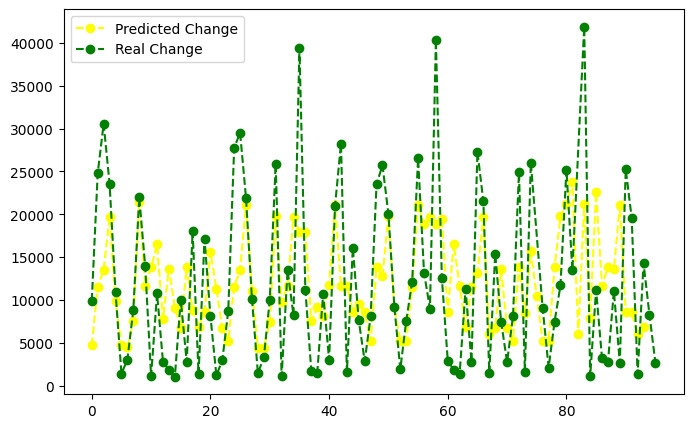

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred, label = 'Predicted Change',
         linestyle="--", marker='o', color='yellow') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot( shrimp_alldata['PRODUCT'], label = 'Real Change',
         linestyle="--", marker='o', color='green') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

## **การประเมินผลโมเดล (Model Evaluation)**

ชุดข้อมูลฝึกฝน (Training Set)

In [ ]:
KNNR_report = evaluate_model(y_train, y_pred_train, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: 0.29
Mean Square Error: 72675486.6
Root Mean Square Error: 8524.99



Text(0, 0.5, 'Actual')

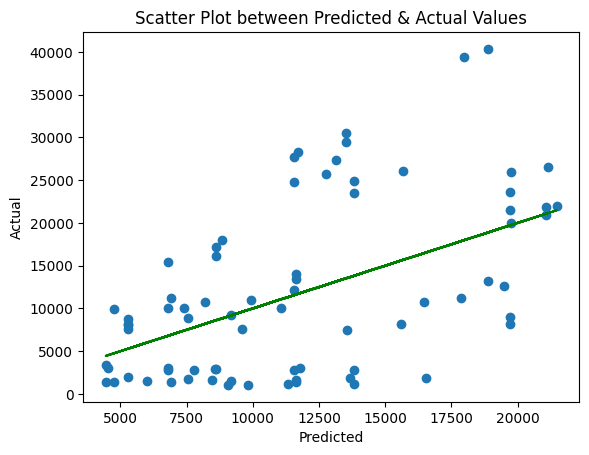

In [ ]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='green')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

ชุดข้อมูลทดสอบ (Test Set)

In [ ]:
evaluate_model(y_test, y_pred_test, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: 0.33
Mean Square Error: 70944481.11
Root Mean Square Error: 8422.85



{'modelName': 'K-Nearest Neighbors Regression',
 'r2': 0.329232275387776,
 'mse': 70944481.10608552,
 'rmse': 8422.854688648351}

Text(0, 0.5, 'Actual')

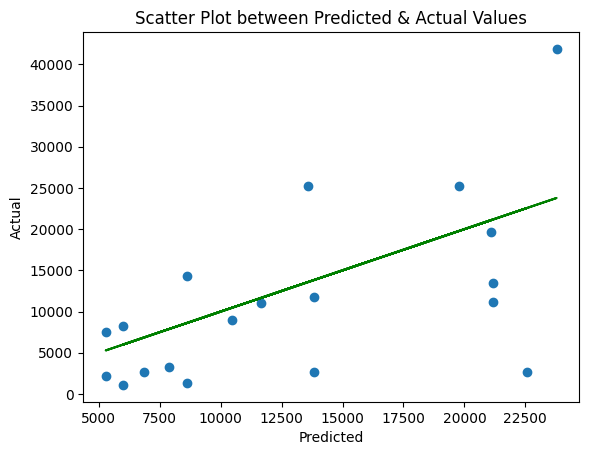

In [ ]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='green')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## **Multiple Linear Regression (MLR)**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.intercept_

44837.8315390055

In [ ]:
reg.coef_

array([    5.44862498, -1303.8597866 ,   -31.24793112])

## **การพยากรณ์ (Predictions)**

ชุดข้อมูลฝึกฝน (Training Set)

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([ 5970.9427873 , 10619.2229296 , 11674.89512029, 17861.31331476,
       13251.69428365,  6914.14602926,  7224.82000889, 11879.28200435,
       19072.16528088, 13590.04228473,  7329.57218412, 13778.37870729,
        8182.64085409, 10785.43392819, 10240.57143031, 13696.44055109,
        8983.37994446,  8954.90891835, 14245.28705024, 13793.98457753,
       11738.98910224, 12055.00935101, 12629.36314741,  5731.42334551,
       11008.13125501, 10122.52631202, 15193.82403658, 12609.83580332,
        8491.07834163,  8342.66651282, 13054.89862659, 20561.18198843,
       12818.6858936 , 14294.05251191, 17196.27377974, 15910.99074524,
       14499.2407254 , 10633.46782527, 11625.11757141, 14943.37055918,
       10279.34757735, 18749.19975545, 12140.891083  , 14716.41689519,
       14198.51437378, 12332.99770463, 13412.64541368,  4709.65629252,
        8506.08012656,  9394.9871408 , 15034.37716279, 11747.46266362,
        6348.97035212,  6961.45491395, 10670.28886495, 20229.61060119,
      

## **ชุดข้อมูลทดสอบ (Test Set)**

In [ ]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([12712.42173592,  7011.59117485,  7357.38551716, 10741.59187947,
       20291.65593736, 14635.07544378, 16711.64749698, 12592.48701302,
       13826.91415285,  7675.41655181, 16809.98059861, 15881.05161385,
        9560.64663847, 10212.43066047, 17839.43926388, 12850.16849454,
       13158.15169944, 12307.02107038, 13498.70134984])

# **ชุดข้อมูล X (train+test)**

In [ ]:
y_pred = reg.predict(X)
y_pred

array([ 5970.9427873 , 10619.2229296 , 11674.89512029, 17861.31331476,
       13251.69428365,  6914.14602926,  7224.82000889, 11879.28200435,
       19072.16528088, 13590.04228473,  7329.57218412, 13778.37870729,
        8182.64085409, 10785.43392819, 10240.57143031, 13696.44055109,
        8983.37994446,  8954.90891835, 14245.28705024, 13793.98457753,
       11738.98910224, 12055.00935101, 12629.36314741,  5731.42334551,
       11008.13125501, 10122.52631202, 15193.82403658, 12609.83580332,
        8491.07834163,  8342.66651282, 13054.89862659, 20561.18198843,
       12818.6858936 , 14294.05251191, 17196.27377974, 15910.99074524,
       14499.2407254 , 10633.46782527, 11625.11757141, 14943.37055918,
       10279.34757735, 18749.19975545, 12140.891083  , 14716.41689519,
       14198.51437378, 12332.99770463, 13412.64541368,  4709.65629252,
        8506.08012656,  9394.9871408 , 15034.37716279, 11747.46266362,
        6348.97035212,  6961.45491395, 10670.28886495, 20229.61060119,
      

In [ ]:
absolute_dis_list = abs(y_pred -  shrimp_alldata['PRODUCT'])
result_df_mlr = pd.DataFrame({'y_pred': y_pred, ' shrimp_tempmerged_pf_prod': shrimp_alldata['PRODUCT'], 'absolute_difference': absolute_dis_list})

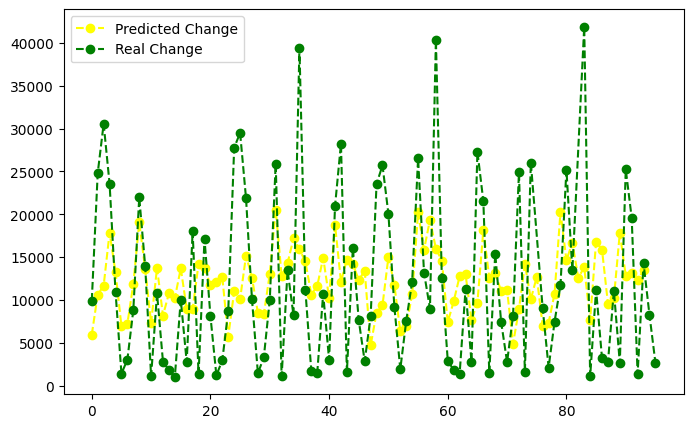

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred, label = 'Predicted Change', linestyle="--", marker='o', color='yellow') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(shrimp_alldata['PRODUCT'], label = 'Real Change', linestyle="--", marker='o', color='green') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

# **การประเมินผลโมเดล (Model Evaluation)**

# **ชุดข้อมูลฝึกฝน (Training Set)**

In [ ]:
MLR_report = evaluate_model(y_train, y_pred_train, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: 0.13
Mean Square Error: 88703601.13
Root Mean Square Error: 9418.26



Text(0, 0.5, 'Actual')

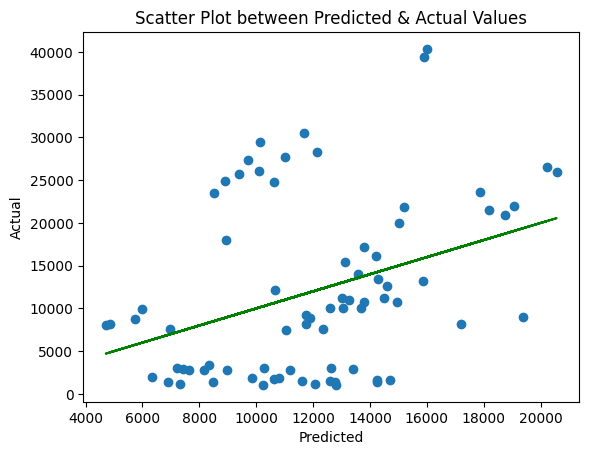

In [ ]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='green')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

 **ชุดข้อมูลทดสอบ (Test Set)**

In [ ]:
evaluate_model(y_test, y_pred_test, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: 0.19
Mean Square Error: 85307860.22
Root Mean Square Error: 9236.23



{'modelName': 'Multiple Linear Regression',
 'r2': 0.1934290250570626,
 'mse': 85307860.22186227,
 'rmse': 9236.225431520295}

Text(0, 0.5, 'Actual')

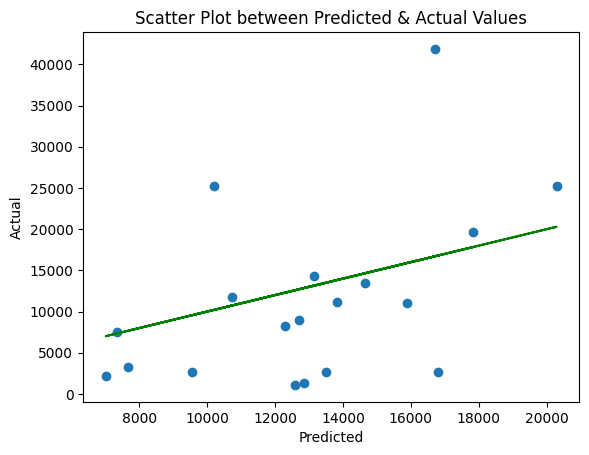

In [ ]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='green')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## การเปรียบเทียบโมเดล

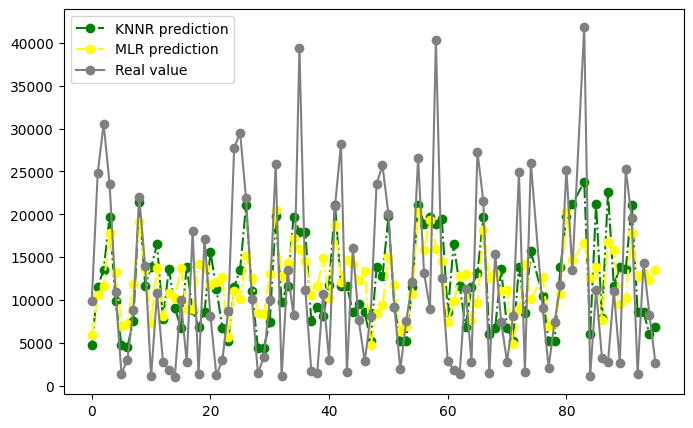

In [ ]:
plt.figure(figsize = (8, 5))
# การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(result_df_knnr['y_pred'], label = 'KNNR prediction', linestyle="-.",marker='o', color='green')
# การเปลี่ยนแปลงที่แท้จริง
plt.plot(result_df_mlr['y_pred'], label = 'MLR prediction', linestyle="-.",marker='o', color='yellow')
# การเปลี่ยนแปลงที่แท้จริง
plt.plot(shrimp_alldata['PRODUCT'], label = 'Real value', linestyle="-", marker='o', color='grey')
plt.legend()

In [ ]:
KNNR_report['modelName']

'K-Nearest Neighbors Regression'

In [ ]:
def print_rep(report) :
  print('Model :', report['modelName'])
  print('R2 :', round(report['r2'], 2))
  print('MSE :', round(report['mse'], 2))
  print('RMSE :', round(report['rmse'], 2))

print_rep(KNNR_report)
print('--------------------------------------')
print_rep(MLR_report)

Model : K-Nearest Neighbors Regression
R2 : 0.29
MSE : 72675486.6
RMSE : 8524.99
--------------------------------------
Model : Multiple Linear Regression
R2 : 0.13
MSE : 88703601.13
RMSE : 9418.26
